# Example of the ABCD method with arbitrary dataset distributions.

This code block are the initialization and imports that are needed. Simulation parameters can be changed here as desired. Four correlations are coded between x and y.

0 is uncorrelated, and causes x and y to be completely unrelated.

1 is a simple linear function, y = x

2 is a simple quadratic function, y = x^2 with a coefficient to control the height of the function based on the x-mean.

3 is a simple exponential function, y = e^x with a coefficient to control the height of the function based on the x-mean.

The chi squared parameter controls the strength of the correlation. At 1, the correlation is perfect. For weak correlations, this should be above 1,000. Don't set this to less than 1.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plot
import math
import copy

random.seed()

# hardcoded values that are adjustable easily from here

xmean = 50 # average x coordinate in distribution
xstdv = 15 # deviation x coordinate in distro
ymean = 50 # average y coordinate in distro for uncorrelated
ystdv = 15 # deviation y coordinate in distro for uncorrelated

ycut = 60 # horizontal quadrant cut
xcut = 65 # vertical quadrant cut

events = 10000 # number of events to generate

chisquared = 3 #controls what the data set's reduced chi squared value would be if fitted to the correlation function.

correlationfunction = 2 #choose which correlation function you want to use.

rchis = 0

mutability = 30 #percentage of coordinates to mutate. 

#initialize variables we'll need later

acount = 0 # events in signal sector
bcount = 0 # events in background 1
ccount = 0 # events in background 2
dcount = 0 # events in background 3

The following code blocks are an experimental alternate way to achieve the same thing using a primitive evolutionary algorithm.

In [2]:
def initial_seed(x, y):
    x.clear()
    y.clear()
    i = 0
    for i in range(0, events):
        x.append(random.gauss(xmean, xstdv))
        y.append(random.gauss(ymean, ystdv))   
        while x[i]<=0:
            x[i] = random.gauss(xmean, xstdv)
        while y[i]<=0:
            y[i] = random.gauss(ymean, ystdv)
        
def count_values(x, y):
    global acount
    global bcount
    global ccount
    global dcount
    acount = 0
    bcount = 0
    ccount = 0
    dcount = 0
    i = 0
    for i in range(0, events):
        if x[i]>=ycut and y[i]>=xcut:
            acount+=1
        if x[i]>=ycut and y[i]<=xcut:
            bcount+=1
        if x[i]<=ycut and y[i]<=xcut:
            ccount+=1
        if x[i]<=ycut and y[i]>=xcut:
            dcount+=1

def chi_calculator(x, y):
    i = 0
    chisq = 0
    if correlationfunction == 1:
        for i in range(0, events):
            expy = x[i] + xmean
            chisq += ((y[i] - expy)**2)/expy
    elif correlationfunction == 2:
        for i in range(0, events):
            expy = x[i]**2/(xmean/5)
            chisq += ((y[i] - expy)**2)/expy
    elif correlationfunction == 3:
        for i in range (0, events):
            expy = math.exp(2*x[i]/xmean)
            chisq += ((y[i] - expy)**2)/expy
    else:
        chisq = chisquared * events
    return(chisq / events)
        

def adjust_algorithm(x, y):
    global rchis
    lowerbound = abs(0.8 * chisquared)
    upperbound = abs(1.2 * chisquared)
    counter = 0
    convergence = 1
    
    decimate = math.floor(events * mutability / 1000.0)*10
    j = 0
    rchis = chi_calculator(x, y)
    newrchis = 0
    failure_counter = 1
    
    tempy = copy.deepcopy(y)
    
    while rchis >= upperbound:
        #strain = random.randint(0, events)
        strain = 0
        for j in range(0, events):
            if correlationfunction == 1:
                expy = x[j] + xmean
            elif correlationfunction == 2:
                expy = x[j]**2/(xmean)
            elif correlationfunction == 3:
                expy = math.exp(2*x[j]/xmean)
            mutation = random.gauss(expy/2, expy/5) * convergence * failure_counter
            if y[strain] - expy <= 0:
                y[strain] += mutation
            else:
                y[strain] -= mutation
            strain += 1
            #strain = random.randint(0, events)
            #if strain >= events-1:
            #    strain = random.randint(0, events)
        newrchis = chi_calculator(x, tempy)
        rchis = chi_calculator(x, y)
        if newrchis < rchis:
            y = copy.deepcopy(tempy)
            convergence -= 0.01
            rchis = copy.copy(newrchis)
            failure_counter -= 0.01
        else:
            tempy = copy.deepcopy(y)
            convergence += 0.01
            failure_counter += 0.01
        counter += 1
        if counter%100 == 0:
            print("This is iteration ", counter, ", with chi squared: ", rchis, ".")
        if counter >= 10000:
            break
        
    while rchis <= lowerbound:
        strain = 0
        #strain = random.randint(0, 9)
        for j in range(0, events):
            mutation = random.gauss(expy/2, expy/4) * convergence * failure_counter
            if y[strain] - expy >= 0:
                y[strain] -= mutation
            else:
                y[strain] += mutation
            strain += 1
            #strain += random.randint(0,9)
            #if strain >= events:
            #    strain = random.randint(0,9)
        newrchis = chi_calculator(x, tempy)
        rchis = chi_calculator(x, y)
        if newrchis > rchis:
            y = copy.deepcopy(tempy)
            convergence -= 0.01
            rchis = copy.copy(newrchis)
            failure_counter -= 0.01
        else:
            tempy = copy.deepcopy(y)
            convergence += 0.01
            failure_counter += 0.01
        counter += 1
        if counter%100 == 0:
            print("This is iteration ", counter, ", with chi squared: ", chi_calculator(x, y), ".")
        if counter >= 10000:
            break
            

This is iteration  100 , with chi squared:  195.31817113070593 .
This is iteration  200 , with chi squared:  195.31817113070593 .
This is iteration  300 , with chi squared:  195.31817113070593 .
This is iteration  400 , with chi squared:  195.31817113070593 .
This is iteration  500 , with chi squared:  195.31817113070593 .
This is iteration  600 , with chi squared:  195.31817113070593 .
This is iteration  700 , with chi squared:  195.31817113070593 .
This is iteration  800 , with chi squared:  195.31817113070593 .
This is iteration  900 , with chi squared:  195.31817113070593 .
This is iteration  1000 , with chi squared:  195.31817113070593 .
This is iteration  1100 , with chi squared:  195.31817113070593 .
This is iteration  1200 , with chi squared:  195.31817113070593 .
This is iteration  1300 , with chi squared:  195.31817113070593 .
This is iteration  1400 , with chi squared:  195.31817113070593 .
This is iteration  1500 , with chi squared:  195.31817113070593 .
This is iteration  

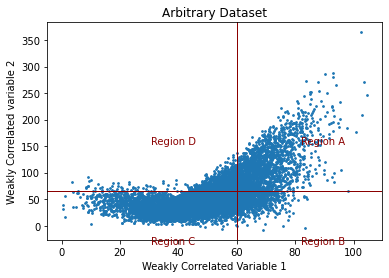

 Events in sector A:  1833 
 Events in sector B:  772 
 Events in Sector C:  6310 
 Events in sector D:  1085 

 Estimated events in sector A using ABCD method:  132.74 ± 11.52 

 Reduced chi squared value of distribution:  201.3030272075903


In [3]:
xcoordinates = []
ycoordinates = []

initial_seed(xcoordinates, ycoordinates)

adjust_algorithm(xcoordinates, ycoordinates)

count_values (xcoordinates, ycoordinates)

# create the actual plots
Dataset = plot.scatter(xcoordinates, ycoordinates, marker='o', s=3)
plot.axvline(x=ycut, c='darkred', lw=1)
plot.axhline(y=xcut, c='darkred', lw=1)
plot.title("Arbitrary Dataset")
plot.xlabel("Weakly Correlated Variable 1")
plot.ylabel("Weakly Correlated variable 2")
plot.annotate("Region A",
             xy=(xcut,ycut),
              textcoords="offset points",
              xytext=(50,50),
              c='darkred'
             )
plot.annotate("Region B",
             xy=(xcut,ycut),
              textcoords="offset points",
              xytext=(50,-50),
              c='darkred'
             )
plot.annotate("Region C",
             xy=(xcut,ycut),
              textcoords="offset points",
              xytext=(-100,-50),
              c='darkred'
             )
plot.annotate("Region D",
             xy=(xcut,ycut),
              textcoords="offset points",
              xytext=(-100,50),
              c='darkred'
             )
plot.show()
# print the number of counts in each sector

print(" Events in sector A: " , acount, "\n", "Events in sector B: ", bcount, "\n", "Events in Sector C: ", ccount, "\n", "Events in sector D: ", dcount, "\n")
        

# calculate estimated background in sector A using ABCD method, and the Poisson error

estimatedacount = round(bcount * dcount / ccount, 2)
estimatederror = round(math.sqrt(estimatedacount), 2)

# print what ABCD tells us is the background in sector A.

print(" Estimated events in sector A using ABCD method: ", estimatedacount, u"\u00b1", estimatederror, "\n")
print(" Reduced chi squared value of distribution: ", chi_calculator(xcoordinates, ycoordinates))